
## Exploratory Data Analysis (EDA) on College Basketball Player Data

The goal of this analysis is to evaluate a dataset of college basketball players' statistics to identify 
promising players who might be the "next big thing" in basketball. We approach this with the domain knowledge 
of an NBA scout looking for potential draft picks.


### Metadata Overview

The metadata provides a clear description of each feature in the dataset.

In [1]:
import pandas as pd
import sys
sys.path.append("../src")

# Load the metadata file
metadata = pd.read_csv('../data/raw/metadata.csv')
metadata

,feature,name,description
0,1,team,Name of team
1,2,conf,Name of conference
2,3,GP,Games played
3,4,Min_per,Player's percentage of available team minutes ...
4,5,ORtg,ORtg - Offensive Rating (available since the 1...
...,...,...,...
59,66,stl,STL - Steals (available since the 1973-74 seas...
60,67,blk,BLK - Blocks (available since the 1973-74 seas...
61,68,pts,PTS - Points
62,69,player_id,Unique identifier of player


### Main Dataset Overview

In [2]:
# Load the main dataset
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw//test.csv')
# Display the first few rows of the dataset
train_data.head()

C:\Users\Sahil Kotak\AppData\Local\Temp\ipykernel_16516\2529321639.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/raw/train.csv')


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [3]:
train_data.shape

(56091, 64)

### Data Quality Check

In [4]:

# Check for missing values in the dataset
dqc = train_data.isnull().sum()

# Filter out columns with missing values
dqc = dqc[dqc > 0]

dqc_percentage = (dqc / len(train_data)) * 100

dqc_df = pd.DataFrame({
    'Missing Values': dqc,
    'Percentage': dqc_percentage
})

dqc_df.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
pick,54705,97.529015
Rec_Rank,39055,69.627926
dunks_ratio,30793,54.898290
mid_ratio,9688,17.271933
rim_ratio,9464,16.872582
rimmade,6081,10.841311
rimmade_rimmiss,6081,10.841311
midmade,6081,10.841311
midmade_midmiss,6081,10.841311
dunksmade,6081,10.841311


### Target Distribution Analysis

In [5]:
# Check the distribution of the 'drafted' column
drafted_distribution = train_data['drafted'].value_counts(normalize=True) * 100

drafted_distribution

drafted
0.0    99.04441
1.0     0.95559
Name: proportion, dtype: float64

### Statistical Summary of Numeric Features

In [6]:
# Get a statistical summary of the numeric features
numeric_summary = train_data.describe()

numeric_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
GP,56091.0,23.411973,10.090542,1.000000,16.000000,28.000000,31.000000,41.000000
Min_per,56091.0,37.325229,28.061897,0.000000,9.500000,35.900000,62.200000,98.000000
Ortg,56091.0,91.858295,30.538819,0.000000,84.100000,97.100000,106.900000,834.000000
usg,56091.0,18.149265,6.204489,0.000000,14.500000,18.100000,21.800000,50.000000
eFG,56091.0,44.575513,18.213813,0.000000,40.100000,47.700000,53.200000,150.000000
TS_per,56091.0,47.676882,17.414133,0.000000,43.930000,50.850000,56.060000,150.000000
ORB_per,56091.0,5.575376,9.480239,0.000000,1.800000,4.300000,8.100000,1576.600000
DRB_per,56091.0,12.673716,10.878099,0.000000,8.400000,11.900000,16.000000,1385.000000
AST_per,56091.0,10.848740,9.356001,0.000000,4.600000,9.100000,15.100000,100.000000
TO_per,56091.0,20.337819,12.226129,0.000000,14.800000,19.100000,24.500000,100.000000


### Correlation Analysis with 'drafted' Column

In [7]:
# Drop non-numeric columns from the dataset
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with the 'drafted' column for the numeric columns
correlation_with_drafted = numeric_data.corr()['drafted'].sort_values(ascending=False)

# Display the top and bottom 10 correlated features
top_correlated = correlation_with_drafted.head(11)[1:]  # exclude the 'drafted' column itself
bottom_correlated = correlation_with_drafted.tail(10)

correlation_summary = pd.concat([top_correlated, bottom_correlated])

correlation_summary

porpag                 0.255466
dunksmade              0.242278
dunksmiss_dunksmade    0.239062
dporpag                0.224393
twoPM                  0.223080
FTM                    0.214437
FTA                    0.209107
twoPA                  0.207722
midmade                0.206861
midmade_midmiss        0.203508
blk_per                0.023758
stl_per                0.018638
ORB_per                0.012876
ftr                    0.011862
year                  -0.003536
pfr                   -0.027427
TO_per                -0.032557
drtg                  -0.073582
adrtg                 -0.107044
pick                  -0.184554
Name: drafted, dtype: float64

### Visualization Analysis of Key Metrics vs. Drafted Status

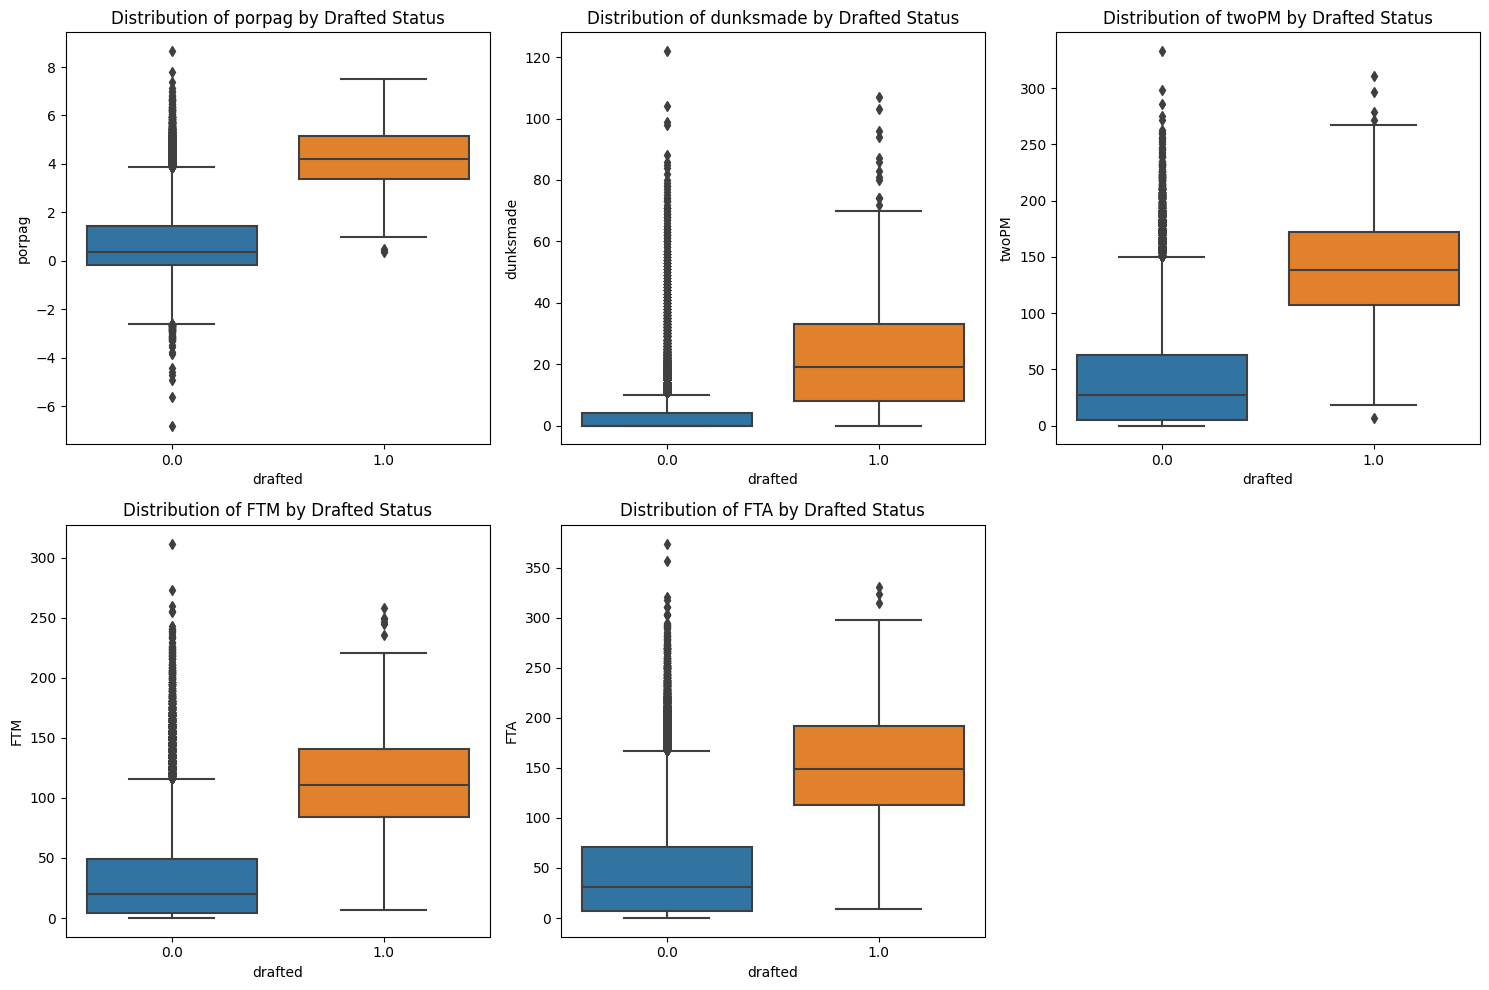

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize
features_to_visualize = ['porpag', 'dunksmade', 'twoPM', 'FTM', 'FTA']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='drafted', y=feature, data=train_data)
    plt.title(f'Distribution of {feature} by Drafted Status')

plt.tight_layout()
plt.show()

## Data Preparation

In [9]:
train_data.shape

(56091, 64)

In [10]:
original_train_data = train_data.copy()

In [11]:
from data.data_preprocessing_v2 import preprocess_func

preprocessed_train_data, training_statistics = preprocess_func(train_data, original_df=original_train_data)

In [12]:
preprocessed_train_data.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


## Feature Engineering

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



# Split the data into training and validation sets
X = preprocessed_train_data.drop(['drafted'], axis=1)
y = preprocessed_train_data['drafted']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)



## Modeling

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import xgboost as xgb

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Learning Rate", "N Estimators", "Max Depth", "Subsample", 
                                   "Colsample Bytree", "Gamma", "ROC AUC Score"])

# Custom scorer to log parameters and scores
def custom_scorer(y_true, y_pred):
    score = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC Score: {score}")
    return score

# Function to update results DataFrame
def log_results(estimator):
    global results_df
    params = estimator.get_params()
    score = roc_auc_score(y_val, estimator.predict_proba(X_val_scaled)[:, 1])
    new_row = {
        "Learning Rate": params["learning_rate"],
        "N Estimators": params["n_estimators"],
        "Max Depth": params["max_depth"],
        "Subsample": params["subsample"],
        "Colsample Bytree": params["colsample_bytree"],
        "Gamma": params["gamma"],
        "ROC AUC Score": score
    }
    results_df = results_df.append(new_row, ignore_index=True)
    print(f"Evaluating model with parameters: {params}")
    print(f"ROC AUC Score: {score}")

# Define the XGBoost model and hyperparameters for tuning
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, eval_metric='auc')
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 0.25, 0.5, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    xgb_model, 
    param_grid=param_dist, 
    scoring=make_scorer(custom_scorer, needs_proba=True), 
    n_jobs=-1, 
    cv=3, 
    verbose=2
)

# Assuming X_train_scaled and y_train are your training data and labels
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Log results for the best model
log_results(best_xgb_model)

# Predict on the validation set
xgb_preds = best_xgb_model.predict_proba(X_val_scaled)[:, 1]

# Get the AUROC score
xgb_val_score = roc_auc_score(y_val, xgb_preds)

print(f"Best AUROC Score: {xgb_val_score}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("Logged Results:")
print(results_df)


Best AUROC Score: 0.9897645519947679
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.25, 'colsample_bytree': 0.9}


## Generating Test Data Result

In [15]:
# 1. Preprocess the test data using the train_stats from the training data preprocessing
preprocessed_test_data, _ = preprocess_func(test_data, train_stats=training_statistics)

In [16]:
# Apply preprocessing to the test data
X_test_scaled = preprocessor.transform(preprocessed_test_data)

# Use the best XGBoost model to make predictions
test_preds_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Create a submission DataFrame
submission_xgb = pd.DataFrame({'player_id': preprocessed_test_data['player_id'], 'drafted': test_preds_xgb})

# Save the submission DataFrame to a CSV file
submission_path_xgb = 'submission_week3_xgboostmodel.csv'
submission_xgb.to_csv(submission_path_xgb, index=False)
submission_path_xgb

'submission_week3_xgboostmodel.csv'